<h1>Relax Inc. Take-Home Challenge</h1>
<img src="./1.png" alt="info">

<h3>IMPORTING...</h3>

In [129]:
# loading necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

<h3>WRANGLING...</h3>

In [130]:
# loading data
path_1 = "./takehome_user_engagement.csv"
df_1 = pd.read_csv(path_1)
print(df_1.head(5))

            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1


In [131]:
# inspecting data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [132]:
# converting time_stemp into datetime type
df_1['time_stamp'] = pd.to_datetime(df_1['time_stamp'])
df_1.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [133]:
# checking for NaNs
def count_nans(df):
    for i in list(df.columns):
        print(f"{i} : {df[i].isna().sum()}")

In [134]:
count_nans(df_1)

time_stamp : 0
user_id : 0
visited : 0


In [135]:
# statistics
df_1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [136]:
# sorting
df_1.sort_values(by=['user_id', 'time_stamp'], inplace=True)
df_1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [137]:
# adding more features from specified timedate columns
def extracting_timestamp_features(df, col_names):
    for i in col_names:
        df[i + '_day'] = df[i].apply(lambda x: x.day)
        df[i + '_week'] = df[i].apply(lambda x: x.week)
        df[i + '_month'] = df[i].apply(lambda x: x.month)
        df[i + '_year'] = df[i].apply(lambda x: x.year)
        df[i + '_date'] = df[i].apply(lambda x: x.date())
    return df

In [138]:
df_1 = extracting_timestamp_features(df_1, ['time_stamp'])
df_1.head(10)

,time_stamp,user_id,visited,time_stamp_day,time_stamp_week,time_stamp_month,time_stamp_year,time_stamp_date
0,2014-04-22 03:53:30,1,1,22,17,4,2014,2014-04-22
1,2013-11-15 03:45:04,2,1,15,46,11,2013,2013-11-15
2,2013-11-29 03:45:04,2,1,29,48,11,2013,2013-11-29
3,2013-12-09 03:45:04,2,1,9,50,12,2013,2013-12-09
4,2013-12-25 03:45:04,2,1,25,52,12,2013,2013-12-25
5,2013-12-31 03:45:04,2,1,31,1,12,2013,2013-12-31
6,2014-01-08 03:45:04,2,1,8,2,1,2014,2014-01-08
7,2014-02-03 03:45:04,2,1,3,6,2,2014,2014-02-03
8,2014-02-08 03:45:04,2,1,8,6,2,2014,2014-02-08
9,2014-02-09 03:45:04,2,1,9,6,2,2014,2014-02-09


In [139]:
# gouping
test_1 = df_1.groupby(['user_id', 'time_stamp_year', 'time_stamp_month', 'time_stamp_week'])
print(type(test_1))
print(test_1)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [140]:
test_2 = test_1.agg({'visited': ['count'],
                    'time_stamp_day': ['unique']})
test_2.head(10)

visited  \
                                                           count   
user_id time_stamp_year time_stamp_month time_stamp_week           
1       2014            4                17                    1   
2       2013            11               46                    1   
                                         48                    1   
                        12               1                     1   
                                         50                    1   
                                         52                    1   
        2014            1                2                     1   
                        2                6                     3   
                                         7                     2   
                        3                10                    1   

                                                         time_stamp_day  
                                                                 unique  
user_id time_stamp_year time_stamp_month time_stamp_week                 
1       2014            4                17                        [22]  
2       2013            11               46                        [15]  
                                         48                        [29]  
                        12               1                         [31]  
                                         50                         [9]  
                                         52                        [25]  
        2014            1                2                          [8]  
                        2                6                    [3, 8, 9]  
                                         7                     [13, 16]  
                        3                10                         [9]

In [141]:
# checking results
df_1.loc[(df_1['user_id'] == 2) & (df_1['time_stamp_week'] == 6)]

,time_stamp,user_id,visited,time_stamp_day,time_stamp_week,time_stamp_month,time_stamp_year,time_stamp_date
7,2014-02-03 03:45:04,2,1,3,6,2,2014,2014-02-03
8,2014-02-08 03:45:04,2,1,8,6,2,2014,2014-02-08
9,2014-02-09 03:45:04,2,1,9,6,2,2014,2014-02-09


In [142]:
# reseting index and renaming columns
test_3 = test_2.reset_index()
test_3.columns = ['user_id', 'year', 'month', 'week', 'visited_count', 'day_unique']
test_3.head(10)

,user_id,year,month,week,visited_count,day_unique
0,1,2014,4,17,1,[22]
1,2,2013,11,46,1,[15]
2,2,2013,11,48,1,[29]
3,2,2013,12,1,1,[31]
4,2,2013,12,50,1,[9]
5,2,2013,12,52,1,[25]
6,2,2014,1,2,1,[8]
7,2,2014,2,6,3,"[3, 8, 9]"
8,2,2014,2,7,2,"[13, 16]"
9,2,2014,3,10,1,[9]


In [143]:
# separating 'adopted_users' from not
mask = test_3['day_unique'].apply(lambda x: True if len(x) >= 3 else False)
test_3[mask].head(10)

,user_id,year,month,week,visited_count,day_unique
7,2,2014,2,6,3,"[3, 8, 9]"
30,10,2013,4,15,3,"[11, 13, 14]"
32,10,2013,4,17,3,"[24, 26, 27]"
34,10,2013,5,18,3,"[1, 2, 3]"
35,10,2013,5,19,5,"[6, 7, 8, 10, 12]"
36,10,2013,5,20,3,"[15, 17, 18]"
39,10,2013,6,23,4,"[3, 4, 7, 9]"
40,10,2013,6,24,5,"[10, 11, 13, 15, 16]"
41,10,2013,6,25,3,"[17, 18, 22]"
42,10,2013,6,26,3,"[26, 28, 30]"


In [144]:
# creating list to hold 'adopted users'
adopted_user_list = set(test_3[mask]['user_id'])

In [145]:
# importing second documnet 'takehome_users.csv'
path_2 = "./takehome_users.csv"
df_2 = pd.read_csv(path_2, encoding='latin-1', parse_dates=['creation_time'])
df_2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [146]:
# cechecking the structure of the file
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [147]:
# adding target column
df_2['target'] = df_2['object_id'].apply(lambda x: 1 if x in adopted_user_list else 0)
df_2['target'].unique()

array([0, 1], dtype=int64)

In [148]:
# checking for duplicates for each column
def check_duplicates(df):
    for i in list(df.columns):
        print(f"{i} : {df.duplicated(subset=[i]).sum()}")

In [149]:
check_duplicates(df_2)

object_id : 0
creation_time : 4
name : 645
email : 20
creation_source : 11995
last_session_creation_time : 3178
opted_in_to_mailing_list : 11998
enabled_for_marketing_drip : 11998
org_id : 11583
invited_by_user_id : 9435
target : 11998


In [150]:
# checking for NaNs for each column
def check_for_nans(df):
    for i in list(df.columns):
        print(f"{i} : {df[i].isna().sum()}")

In [151]:
check_for_nans(df_2)

object_id : 0
creation_time : 0
name : 0
email : 0
creation_source : 0
last_session_creation_time : 3177
opted_in_to_mailing_list : 0
enabled_for_marketing_drip : 0
org_id : 0
invited_by_user_id : 5583
target : 0


In [152]:
# because a huge portion of the data is missing for columns 'last_session_creation_time' and 'invited_by_user_id' we will be dropping them.
# but we also will check later on if they are valuable features but separately
df_2_withoutNANs = df_2[['object_id', 'creation_time', 'name', 'email', 'creation_source', 'opted_in_to_mailing_list',
                        'enabled_for_marketing_drip', 'org_id', 'target']]

df_2_with_invBYuserID_col = df_2[['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'target']]
df_2_with_invBYuserID_col = df_2_with_invBYuserID_col.dropna(subset=['invited_by_user_id'])

df_2_with_lastSessionCreationTime_col = df_2[['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'target']]
df_2_with_lastSessionCreationTime_col = df_2_with_lastSessionCreationTime_col.dropna(subset=['last_session_creation_time'])

print(df_2_withoutNANs.shape, df_2_with_invBYuserID_col.shape, df_2_with_lastSessionCreationTime_col.shape)

(12000, 9) (6417, 10) (8823, 10)


<AxesSubplot:xlabel='target', ylabel='Count'>

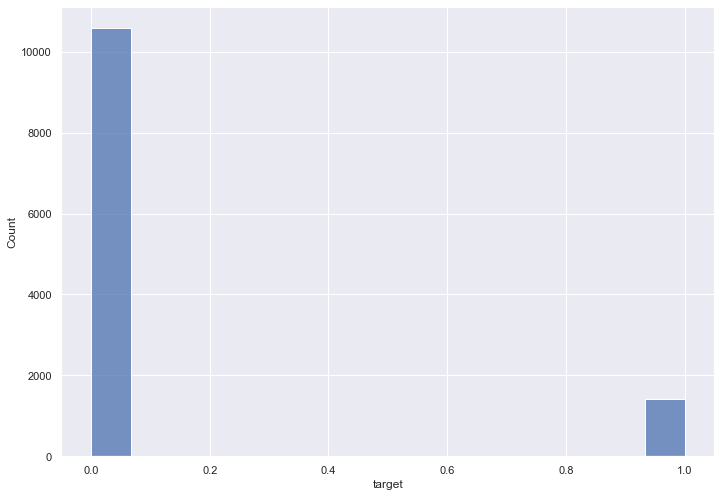

In [188]:
sns.histplot(df_2_withoutNANs['target'])

In [153]:
# working with 'df_2_withoutNANs' dataframe
df_2_withoutNANs

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,target
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0
...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0


In [169]:
# function to map values
dic_creation_source = {
    'GUEST_INVITE': 0,
    'ORG_INVITE': 1,
    'SIGNUP': 2,
    'PERSONAL_PROJECTS': 3,
    'SIGNUP_GOOGLE_AUTH': 4,
    'SIGNUP_GOOGLE_AUTH': 5,
}
def mapping_col(df, col_name, dic_val):
    for i in col_name:
        df[i + "_int"] = df[i].map(dic_val)
        
    return df

In [154]:
def complete_analysis(df, col_names):
    df = extracting_timestamp_features(df, col_names)
    df['email_org'] = df['email'].apply(lambda x: x.split("@")[1])
    df = mapping_col(df, ['creation_source'], dic_creation_source)

In [155]:
# extracting more features for 'creation_time' columns
df_2_withoutNANs = extracting_timestamp_features(df_2_withoutNANs, ['creation_time'])
df_2_withoutNANs['email_org'] = df_2_withoutNANs['email'].apply(lambda x: x.split("@")[1])

df_2_withoutNANs

<ipython-input-137-e93c8d07a598>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i + '_day'] = df[i].apply(lambda x: x.day)


,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,target,creation_time_day,creation_time_week,creation_time_month,creation_time_year,creation_time_date
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,22,17,4,2014,2014-04-22
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,1,15,46,11,2013,2013-11-15
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,19,12,3,2013,2013-03-19
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,21,21,5,2013,2013-05-21
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,17,3,1,2013,2013-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,0,6,36,9,2013,2013-09-06
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0,10,2,1,2013,2013-01-10
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,0,27,17,4,2014,2014-04-27
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0,31,22,5,2012,2012-05-31


In [160]:
df_2_withoutNANs['email_org'] = df_2_withoutNANs['email'].apply(lambda x: x.split("@")[1])
df_2_withoutNANs

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,target,creation_time_day,creation_time_week,creation_time_month,creation_time_year,creation_time_date,email_org
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,22,17,4,2014,2014-04-22,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,1,15,46,11,2013,2013-11-15,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,19,12,3,2013,2013-03-19,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,21,21,5,2013,2013-05-21,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,17,3,1,2013,2013-01-17,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,0,6,36,9,2013,2013-09-06,gustr.com
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0,10,2,1,2013,2013-01-10,gmail.com
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,0,27,17,4,2014,2014-04-27,cuvox.de
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0,31,22,5,2012,2012-05-31,iuxiw.com


In [164]:
# mapping 'creation_source' col
df_2_withoutNANs = mapping_col(df_2_withoutNANs, ['creation_source'], dic_creation_source)
df_2_withoutNANs

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,target,creation_time_day,creation_time_week,creation_time_month,creation_time_year,creation_time_date,email_org,creation_source_int
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,22,17,4,2014,2014-04-22,yahoo.com,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,1,15,46,11,2013,2013-11-15,gustr.com,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,19,12,3,2013,2013-03-19,gustr.com,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,21,21,5,2013,2013-05-21,yahoo.com,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,17,3,1,2013,2013-01-17,yahoo.com,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,0,6,36,9,2013,2013-09-06,gustr.com,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0,10,2,1,2013,2013-01-10,gmail.com,5
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,0,27,17,4,2014,2014-04-27,cuvox.de,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0,31,22,5,2012,2012-05-31,iuxiw.com,3


In [174]:
# making mapping for 'email_org'
email_org_uniqueVal = list(df_2_withoutNANs['email_org'].unique())
dic_email_org = {}
for i in range(len(email_org_uniqueVal)):
    dic_email_org[email_org_uniqueVal[i]] = i
len(dic_email_org), len(email_org_uniqueVal)

(1184, 1184)

In [175]:
# mapping 'email_org' col
df_2_withoutNANs = mapping_col(df_2_withoutNANs, ['email_org'], dic_email_org)
df_2_withoutNANs

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,target,creation_time_day,creation_time_week,creation_time_month,creation_time_year,creation_time_date,email_org,creation_source_int,email_org_int
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,22,17,4,2014,2014-04-22,yahoo.com,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,1,15,46,11,2013,2013-11-15,gustr.com,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,19,12,3,2013,2013-03-19,gustr.com,1,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,21,21,5,2013,2013-05-21,yahoo.com,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,17,3,1,2013,2013-01-17,yahoo.com,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,0,6,36,9,2013,2013-09-06,gustr.com,1,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0,10,2,1,2013,2013-01-10,gmail.com,5,5
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,0,27,17,4,2014,2014-04-27,cuvox.de,0,4
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0,31,22,5,2012,2012-05-31,iuxiw.com,3,1183


In [177]:
df_2_withoutNANs.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'target', 'creation_time_day', 'creation_time_week',
       'creation_time_month', 'creation_time_year', 'creation_time_date',
       'email_org', 'creation_source_int', 'email_org_int'],
      dtype='object')

<AxesSubplot:>

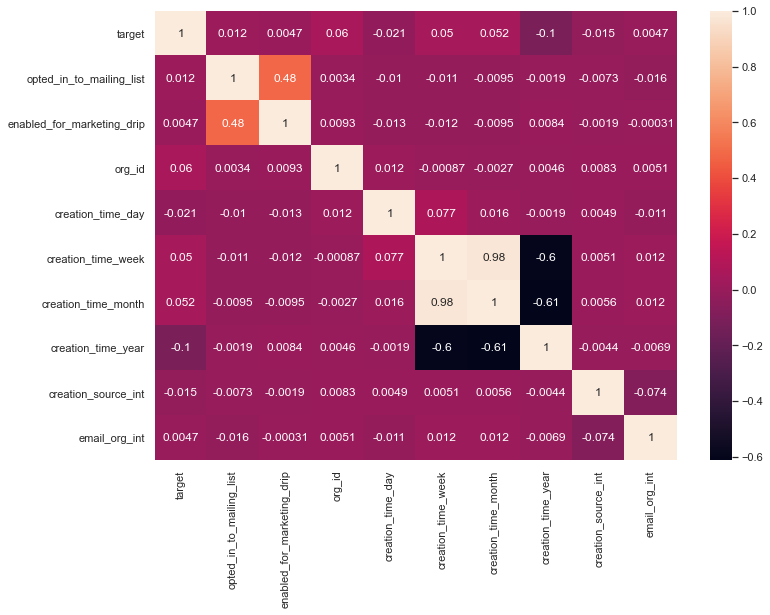

In [184]:
# checking correlations
df_2_withoutNANs_cleaned = df_2_withoutNANs[['target', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
        'creation_time_day', 'creation_time_week','creation_time_month', 'creation_time_year',
        'creation_source_int', 'email_org_int']]

sns.heatmap(df_2_withoutNANs_cleaned.corr(), annot=True)

<h3>SUMMARY</h3>
<p>So, we were able to look at two files. First, we start working with the 'takehome_user_engagement' document to identify 'users' who are considered to be '"adopted user', based on provided conditions.  Unfortunately, there were not much of them. So, we ended up with biased data toward not "adopted users". 
<br /><br />Nevertheless, digging deeper we were able to identify a few interesting things. First of all, there is a strong connection between the time when the account was created and the current use of the app. If we will go further, we could identify the exact year and find the reason why (based on what event). Also, there is a connection between the organization the user belongs to and its activity. So, probably the use of the app is closely related to the working task from the organization. And finally, we could say that there is a correlation in how the account was created. So, we if will spend more time, we could find out which way is most promising for the future prediction. 
<br /><br />Definitely, there is room for improvement for analytical observation by dealing with dropped columns: 'invited_by_user_id', and 'last_session_creation_time'. But, there is much data is missing. So, it will be reasonable to find the reason why it was missing in the first place and find the proper approach to solve it. Additionally, we could add extra features like gender, so we will be able to target a specific group of people properly. </p>